In [ ]:
# Make plots that overlay results on previous published calcs

In [1]:
import sys
from pathlib import Path
sys.path.append("../src/")
sys.path.append("../src/AtomicTrit")
sys.path.append("../src/AtomicTrit/LitReview")
import numpy as np
import pylab as plt
import json
import os

from AtomicTrit import elastic
from AtomicTrit import constants
from AtomicTrit import potentials
from AtomicTrit import dipolelosses
from AtomicTrit.dipolelosses import DipoleChannels
from AtomicTrit import spinexchange
from AtomicTrit.spinexchange import SpinExChannels


try:
    here = Path(__file__).resolve().parent
except NameError:
    here = Path.cwd()

src_root = (here / ".." / "src").resolve()
if str(src_root) not in sys.path:
    sys.path.insert(0, str(src_root))

In [2]:
B_values = np.logspace(-3,1,50)

T   = 5e-5

GVsB_HDip=[]
GVsB_TDip=[]

for c in DipoleChannels:
    Gs=[]
    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(
            c,  B, constants.HydrogenConstants, T, potentials.Silvera_Triplet,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2)
        )
    GVsB_HDip.append(np.array(Gs))
    Gs=[]

    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(
            c,  B, constants.TritiumConstants, T, potentials.Silvera_Triplet,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2)
        )
    GVsB_TDip.append(np.array(Gs))

/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/dipolelosses.py:67: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),Tripl

In [3]:
B_values = np.logspace(-3,1,50)
potT     = potentials.Silvera_Triplet
potS     = potentials.Kolos_Singlet2_VDW

T        = 1e-5

GVsB_HEx=[]
GVsB_TEx=[]

for c in SpinExChannels:
    Gs=[]
    for B in B_values:
        Gs.append(spinexchange.GetGFactor(c,  B, constants.HydrogenConstants(), T, potT,potS,l=0,rhos=np.linspace(1e-9,0.75,2000)))
    GVsB_HEx.append(np.array(Gs))
    Gs=[]

    for B in B_values:
        Gs.append(spinexchange.GetGFactor(c,  B, constants.TritiumConstants(), T, potT,potS,l=0,rhos=np.linspace(1e-9,0.75,2000)))
    GVsB_TEx.append(np.array(Gs))

In [4]:
# To make the plots with real B on x axis
#B_display=B_values

# To make the plots with Stoof scaled B on x axis
B_display=dipolelosses.B_Naught(B_values)

In [5]:
json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Stoof_Exchange_Channels_dd2aa_dd2ad_Mag.json"
)
with open(json_path, "r") as f:
    data = json.load(f)
    
ccaa       = data["datasetColl"][0]["data"]
B_ccaa     = np.array([pt["value"][0] for pt in ccaa])
G_ccaa     = np.array([pt["value"][1] for pt in ccaa])  

ccbd       = data["datasetColl"][1]["data"]
B_ccbd     = np.array([pt["value"][0] for pt in ccbd])
G_ccbd     = np.array([pt["value"][1] for pt in ccbd])  

ccac       = data["datasetColl"][2]["data"]
B_ccac     = np.array([pt["value"][0] for pt in ccac])
G_ccac     = np.array([pt["value"][1] for pt in ccac])  

ddaa       = data["datasetColl"][3]["data"]
B_ddaa     = np.array([pt["value"][0] for pt in ddaa])
G_ddaa     = np.array([pt["value"][1] for pt in ddaa])   

ddad       = data["datasetColl"][4]["data"]
B_ddad     = np.array([pt["value"][0] for pt in ddad])
G_ddad     = np.array([pt["value"][1] for pt in ddad])   

In [6]:
json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Stoof_dd2ac_Mag.json"
)
with open(json_path, "r") as f:
    data = json.load(f)

ddac       = data["datasetColl"][0]["data"]    
B_ddac     = np.array([pt["value"][0] for pt in ddac])
G_ddac     = np.array([pt["value"][1] for pt in ddac])   

In [7]:
json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Stoof_dd2cc_dd2cd_Mag.json"
)
with open(json_path, "r") as f:
    data = json.load(f)

ddcc       = data["datasetColl"][0]["data"]    
B_ddcc     = np.array([pt["value"][0] for pt in ddcc])
G_ddcc     = np.array([pt["value"][1] for pt in ddcc])  

ddcd       = data["datasetColl"][1]["data"]    
B_ddcd     = np.array([pt["value"][0] for pt in ddcd])
G_ddcd     = np.array([pt["value"][1] for pt in ddcd])  

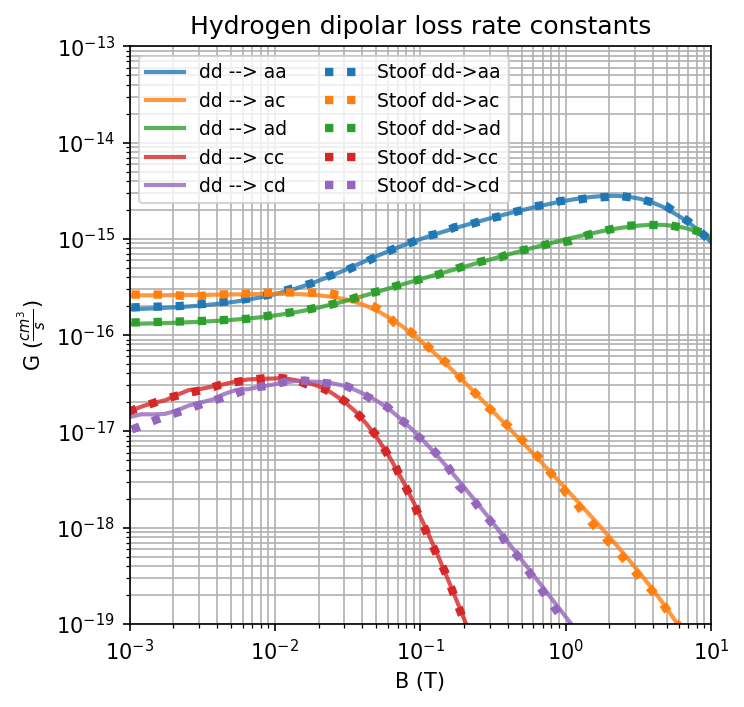

In [8]:
plt.figure(figsize=(5,5),dpi=150)
B_values = np.logspace(-3,1,50)

colors=plt.rcParams['axes.prop_cycle'].by_key()['color']

c=0
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_values,GVsB_HDip[ci],label=Label,color=colors[c],linewidth=2,alpha=0.8)
    c=c+1
    plt.semilogy()

plt.plot(dipolelosses.Invert_B_Naught(B_ddaa),G_ddaa,':',label="Stoof dd->aa",color=colors[0],linewidth=4)
plt.plot(dipolelosses.Invert_B_Naught(B_ddac),G_ddac,':',label="Stoof dd->ac",color=colors[1],linewidth=4)
plt.plot(dipolelosses.Invert_B_Naught(B_ddad),G_ddad,':',label="Stoof dd->ad",color=colors[2],linewidth=4)
plt.plot(dipolelosses.Invert_B_Naught(B_ddcc),G_ddcc,':',label="Stoof dd->cc",color=colors[3],linewidth=4)
plt.plot(dipolelosses.Invert_B_Naught(B_ddcd),G_ddcd,':',label="Stoof dd->cd",color=colors[4],linewidth=4)

plt.xlabel("B (T)")
plt.xlim(1e-3, 10)
plt.ylabel(r'G ($\frac{cm^3}{s}$)')
plt.ylim(1e-19, 1e-13)
plt.title("Hydrogen dipolar loss rate constants")
plt.grid(which='both')
plt.legend(ncol=2,fontsize=9,loc='upper left')
plt.loglog()
plt.savefig("Plots/LitComparison_dipolechannels.png",dpi=250,bbox_inches='tight')

plt.show()

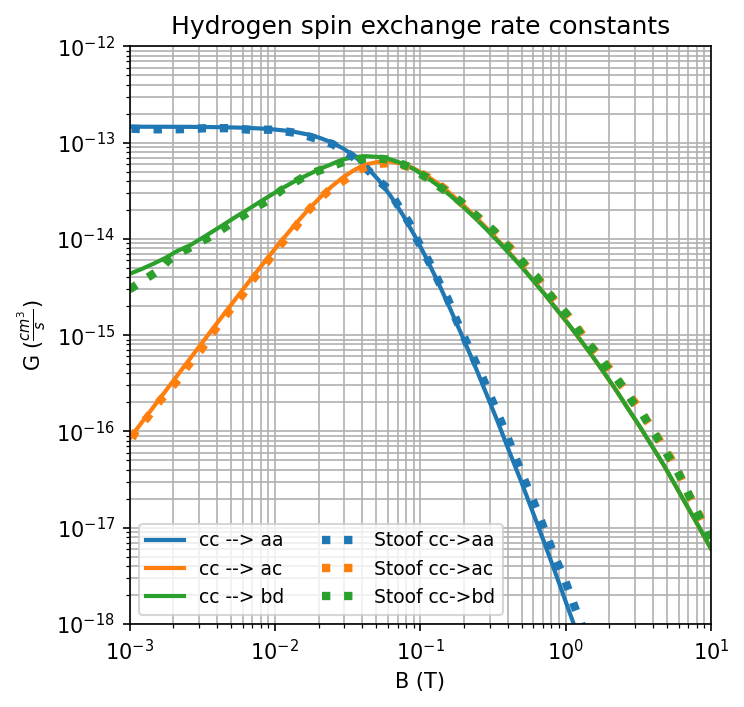

In [9]:
plt.figure(figsize=(5,5),dpi=150)
B_values = np.logspace(-3,1,50)

for ci in range(0,len(SpinExChannels)):
    Label='cc --> '+str(SpinExChannels[ci]['alphaprime'])+str(SpinExChannels[ci]['betaprime'])
    plt.plot(B_values, GVsB_HEx[ci],label=Label,color=colors[ci],linewidth=2)
    plt.semilogy()


plt.plot(dipolelosses.Invert_B_Naught(B_ccaa),G_ccaa,':',label="Stoof cc->aa",color=colors[0],linewidth=4)
plt.plot(dipolelosses.Invert_B_Naught(B_ccac),G_ccac,':',label="Stoof cc->ac",color=colors[1],linewidth=4)
plt.plot(dipolelosses.Invert_B_Naught(B_ccbd),G_ccbd,':',label="Stoof cc->bd",color=colors[2],linewidth=4)

plt.xlabel("B (T)")
plt.xlim(1e-3, 10)
plt.ylabel(r'G ($\frac{cm^3}{s}$)')
plt.ylim(1e-18, 1e-12)
plt.title("Hydrogen spin exchange rate constants")
plt.grid(which='both')
plt.legend(ncol=2,fontsize=9,loc='lower left')
plt.loglog()
plt.savefig("Plots/LitComparison_spinexchannels.png",dpi=250,bbox_inches='tight')
plt.show()

In [10]:
json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Zygelman_Hydrogen_dd2aa.json")

with open(json_path, "r") as f:
    data = json.load(f)
    
ZygaaH        = data["datasetColl"][0]["data"]    
ZygaaKH        = np.array([pt["value"][0] for pt in ZygaaH])  
ZygaaSigH     = np.array([pt["value"][1] for pt in ZygaaH])  

json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Zygelman_Tritium_dd2aa.json")

with open(json_path, "r") as f:
    data = json.load(f)
    
ZygaaT        = data["datasetColl"][0]["data"]    
ZygaaKT       = np.array([pt["value"][0] for pt in ZygaaT])
ZygaaSigT     = np.array([pt["value"][1] for pt in ZygaaT])  

json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Zygelman_Hydrogen_dd2ad.json")

with open(json_path, "r") as f:
    data = json.load(f)
    
ZygadH        = data["datasetColl"][0]["data"]    
ZygadKH       = np.array([pt["value"][0] for pt in ZygadH])
ZygadSigH     = np.array([pt["value"][1] for pt in ZygadH])  

json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Zygelman_Tritium_dd2ad.json")

with open(json_path, "r") as f:
    data = json.load(f)
    
ZygadT        = data["datasetColl"][0]["data"]    
ZygadKT        = np.array([pt["value"][0] for pt in ZygadT])  
ZygadSigT     = np.array([pt["value"][1] for pt in ZygadT])  

mp = 1.672621925e-27
me = 9.1093837139e-31
muH = me+mp/2
kb = 1.380649e-23
bohr = 5.29177210544e-9
C = 1e-2 / bohr**2 * np.sqrt(mp/(4*kb))*1e-15

json_path = os.path.join(
    here, "..", "src", "AtomicTrit", "LitReview", "Stoof_aa_ad.json"
)
with open(json_path, "r") as f:
    data = json.load(f)

Stoofaa = data['datasetColl'][0]['data']
Stoofaax = [pt['value'][0] for pt in Stoofaa]
Stoofaay = [pt['value'][1] for pt in Stoofaa]
Stoofaay = [Stoofaay / np.sqrt(Stoofaax)]

Stoofad = data['datasetColl'][1]['data']
Stoofadx = [pt['value'][0] for pt in Stoofad]
Stoofady = [pt['value'][1] for pt in Stoofad]
Stoofady = [Stoofady / np.sqrt(Stoofadx)]

Stoofaay = C * np.array(Stoofaay).flatten()
Stoofady = C * np.array(Stoofady).flatten()

In [11]:
PWaves=         [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8],[8,6],[8,8],[8,10]]


pot      = potentials.Silvera_Triplet
T_values = np.logspace(-4,2,50)
B_value  = 1e-3


SummedG_aa_T=[]
SummedG_aa_H=[]
for T in T_values:
    SummedG_aa_H.append(dipolelosses.GetSummedGFactor(DipoleChannels[0], B_value, constants.HydrogenConstants, T, pot, PWaves, dm=2,rhos=np.linspace(1e-9,0.75,2000)))
    SummedG_aa_T.append(dipolelosses.GetSummedGFactor(DipoleChannels[0], B_value, constants.TritiumConstants, T, pot, PWaves, dm=2,rhos=np.linspace(1e-9,0.75,2000)))
SummedG_aa_H=np.array(SummedG_aa_H)
SummedG_aa_T=np.array(SummedG_aa_T)


SummedG_ad_T=[]
SummedG_ad_H=[]
for T in T_values:
    SummedG_ad_H.append(dipolelosses.GetSummedGFactor(DipoleChannels[2], B_value, constants.HydrogenConstants, T, pot, PWaves, dm=1,rhos=np.linspace(1e-9,0.75,2000)))
    SummedG_ad_T.append(dipolelosses.GetSummedGFactor(DipoleChannels[2], B_value, constants.TritiumConstants, T, pot, PWaves, dm=1,rhos=np.linspace(1e-9,0.75,2000)))
SummedG_ad_H=np.array(SummedG_ad_H)
SummedG_ad_T=np.array(SummedG_ad_T)

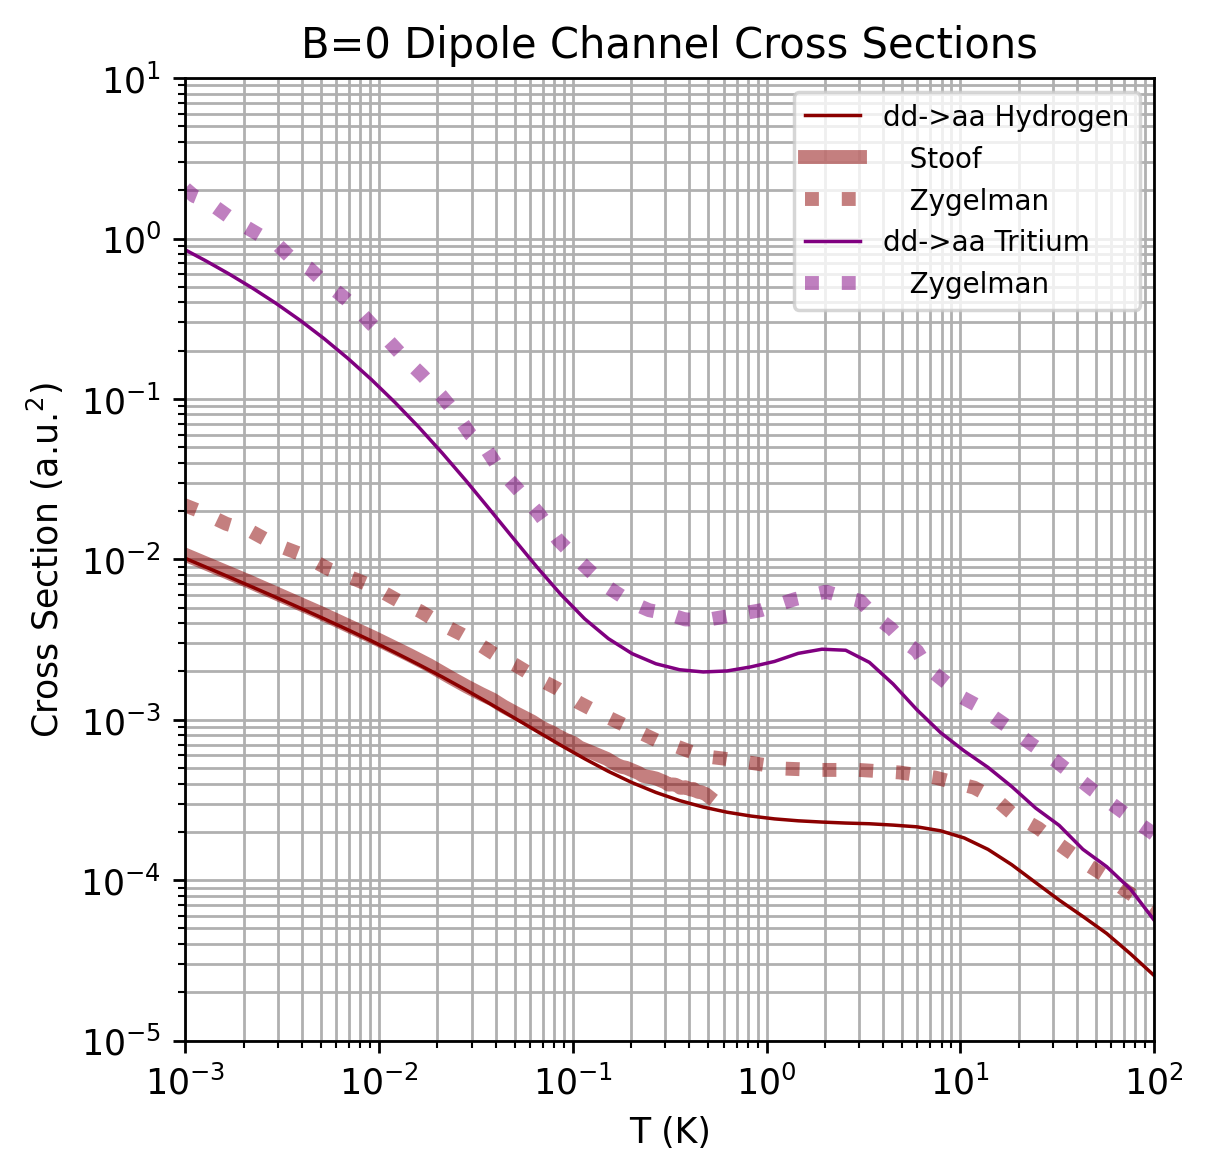

In [12]:


plt.figure(figsize=(5,5),dpi=250)
plt.plot(T_values, dipolelosses.GetCrossSection(SummedG_aa_H,1,T_values),linewidth=1,color='DarkRed',  label='dd->aa Hydrogen')
plt.plot(Stoofaax,Stoofaay,'-',  linewidth=4,color='DarkRed' ,                    label='   Stoof',alpha=0.5)
plt.plot(ZygaaKH, ZygaaSigH,':', linewidth=4,color='DarkRed',                     label='   Zygelman',alpha=0.5)

plt.plot(T_values, dipolelosses.GetCrossSection(SummedG_aa_T,3,T_values),linewidth=1,color='purple',  label='dd->aa Tritium')
plt.plot(ZygaaKT, ZygaaSigT,':',linewidth=4,color='purple',                       label='   Zygelman',alpha=0.5)


plt.semilogy()
plt.xlabel("T (K)")
plt.ylabel(r'Cross Section (a.u.$^2$)')

plt.title("B=0 Dipole Channel Cross Sections")
plt.grid(which='both')
plt.legend(loc='upper right',fontsize=8)
plt.loglog()
plt.ylim(1e-5,10)
plt.xlim(1e-3,100)
plt.savefig("Plots/LitComparison_dd_to_aa.png",dpi=250,bbox_inches='tight')
plt.show()

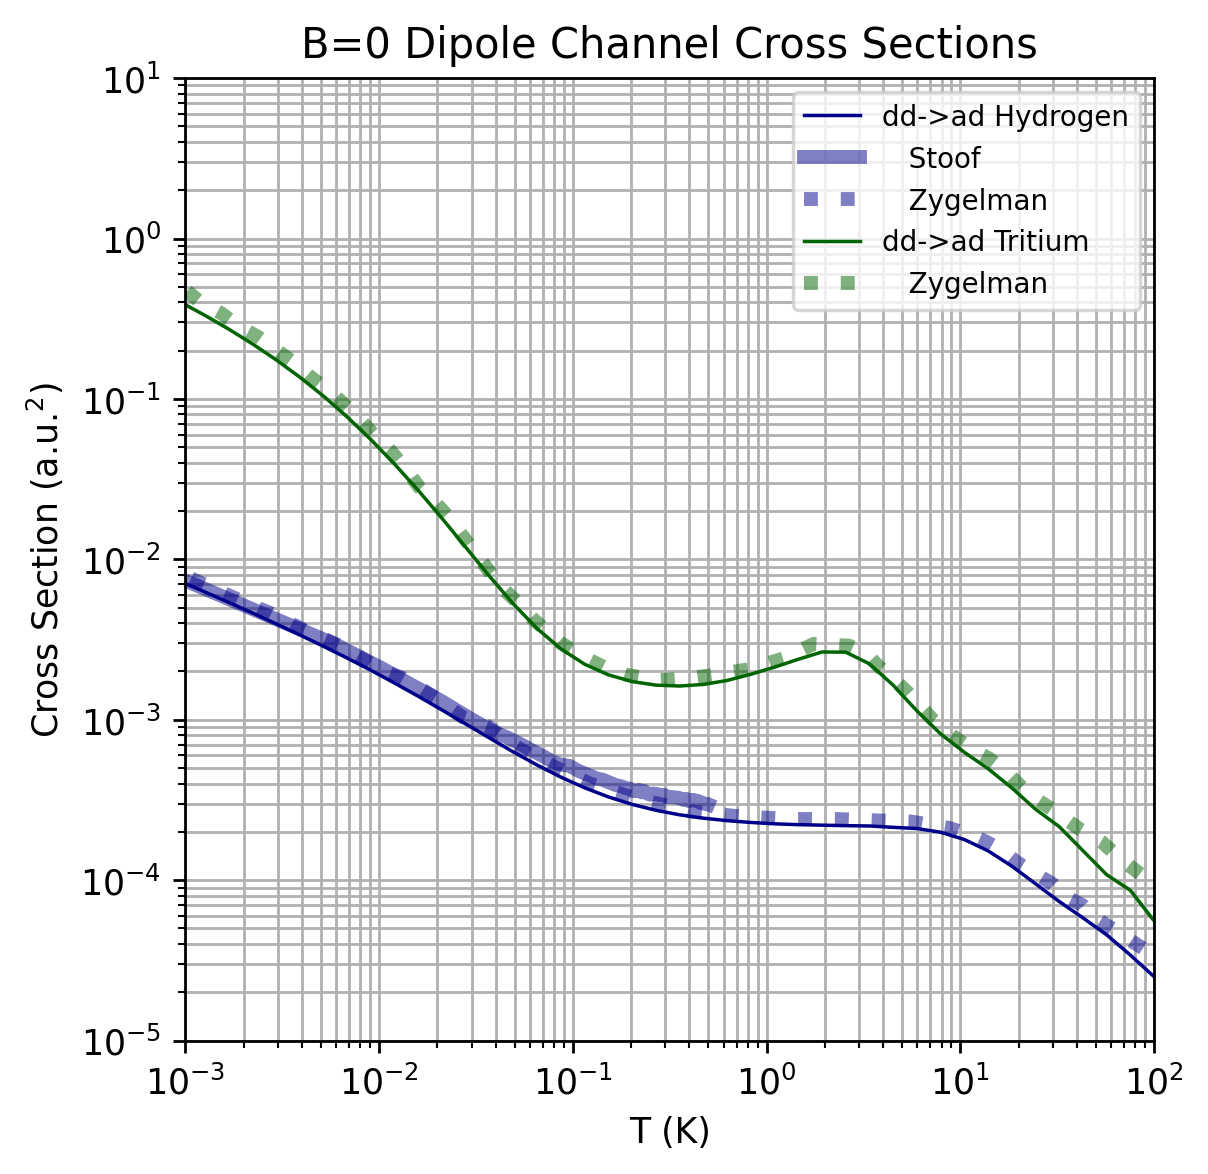

In [16]:


plt.figure(figsize=(5,5),dpi=250)


plt.plot(T_values, dipolelosses.GetCrossSection(SummedG_ad_H,1,T_values),linewidth=1,color='DarkBlue', label='dd->ad Hydrogen')
plt.plot(Stoofadx,Stoofady,'-',linewidth=4,color='DarkBlue',                      label='   Stoof',alpha=0.5)
plt.plot(ZygadKH, ZygadSigH,':',linewidth=4,color='DarkBlue',                     label='   Zygelman' ,alpha=0.5)



plt.plot(T_values,dipolelosses.GetCrossSection(SummedG_ad_T,3,T_values),linewidth=1,color='DarkGreen',label='dd->ad Tritium')
plt.plot(ZygadKT, ZygadSigT,':',linewidth=4,color='DarkGreen',                    label='   Zygelman',alpha=0.5)


plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')

#plt.ylim(1e-19, 1e-15)
plt.title("B=0 Dipole Channel Cross Sections")
plt.grid(which='both')
plt.legend(loc='upper right',fontsize=8)
plt.loglog()
plt.ylim(1e-5,10)
plt.xlim(1e-3,100)
plt.savefig("Plots/LitComparison_dd_to_ad.png",dpi=250,bbox_inches='tight')
plt.show()